# <center> <font color=#B40404>Computer Vision & CNN Project</center>
    
## <center> <font color=#B40404>Submitted by Utathya Ghosh</center>
    
### <center> <font color=#B40404>Batch - AIML Online Jan 21-A</center>

# <center>PART ONE</center>
# <center>PROJECT BASED</center>
# <center>TOTAL SCORE - 60</center>

DOMAIN: Botanical research

CONTEXT: University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo

DATA DESCRIPTION: The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/plant-seedlings-classification/data

PROJECT OBJECTIVE: University’s management require an automation which can create a classifier capable of determining a plant's species from a photo

Steps and tasks:

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import cv2
from PIL import Image
from matplotlib import pyplot as plt
# %matplolib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

#### 1. Import the data. Analyse the dimensions of the data. Visualise the data.

###### <font color=#B40404>Reading files from Zip file to understand the shape and dimensions of the data

###### <font color=#B40404>Please Note that the following work has been done in google *colab*

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# specifying the zip file name
file_name = "/content/drive/My Drive/train-20210824T003001Z-001.zip"
ls_shape = []
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as myzip:
    # storing all the contents of the zip file
    ls_name = myzip.namelist()
# Close access to zip file
myzip.close()

# Store dimensions of each image for further analysis
for path in ls_name:
    with ZipFile(file_name, 'r') as myzip:
         with myzip.open(path, mode='r') as myfile:
            picture = Image.open(myfile)
            ls_shape.append(np.array(picture).shape[0])
    # Close access to zip file
    myzip.close()

264.0
370.0436333123558


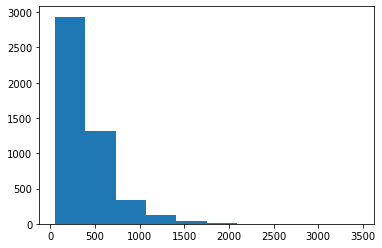

In [ ]:
# Plot the distribution
plt.hist(ls_shape)

print(np.median(ls_shape))
print(np.mean(ls_shape))


###### <font color=#B40404>On further analysis of the shape of each image we have noticed that although mostly the images are square-shaped not all of them are. Also, some images have a 4 colour channel.

###### <font color=#B40404>The 4 colour channel images will be dropped from further analysis since they are far fewer.
    
###### <font color=#B40404>On the other hand, we will reshape all images to size 100x100x3, trying to keep the aspect ratio by introducing padding wherever required. The size 100 was chosen instead of a more median size, based on shape analysis. However, the more median size 264 was too costly based on resources and hence a more reasonable 100x100x3 was chosen.

In [ ]:
# Let's check the distribution of the different classes
y = []
for name in ls_name:
    y.append(name.split('/')[1])
    
np.unique(y, return_counts=True)

(array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
        'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
        'Scentless Mayweed', 'Shepherds Purse',
        'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25'),
 array([263, 390, 287, 611, 221, 475, 671, 221, 516, 231, 496, 385]))

###### <font color=#B40404>Let's view a few images

train/Loose Silky-bent/f6ab6c208.png
Before resize


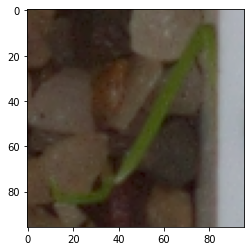

After resize


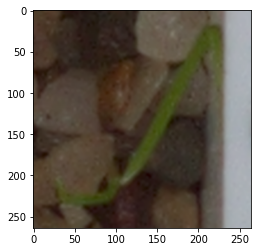

train/Loose Silky-bent/f9aca9f1f.png
Before resize


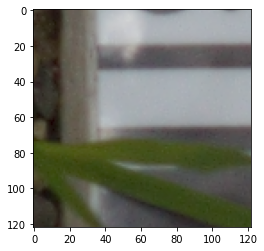

After resize


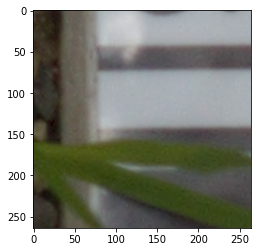

train/Loose Silky-bent/f9a8a0e39.png
Before resize


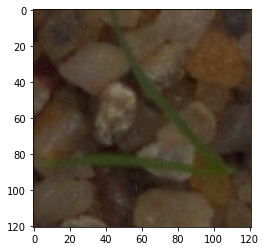

After resize


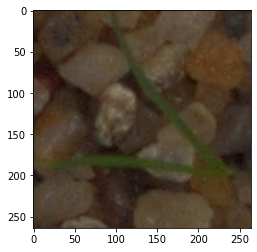

In [ ]:
# specifying the zip file name
file_name = "/content/drive/My Drive/train-20210824T003001Z-001.zip"
ls_shape = []
basewidth = 264
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as myzip:
    # printing all the contents of the zip file
    ls_name = myzip.namelist()
myzip.close()

for path in ls_name[100:103]:
    with ZipFile(file_name, 'r') as myzip:
         with myzip.open(path, mode='r') as myfile:
            picture = Image.open(myfile)
            
            print(path)
            print("Before resize")
            plt.imshow(picture)
            plt.show()
            wpercent = (basewidth/float(picture.size[0]))
            hsize = int((float(picture.size[1])*float(wpercent)))
            picture = picture.resize((basewidth,hsize), Image.ANTIALIAS)
            
            print("After resize")
            plt.imshow(picture)
            plt.show()
            
            ls_shape.append(np.array(picture).shape[0])
            myfile.close()
    myzip.close()

###### <font color=#B40404>First let's Preprocess our data. First read the pictures from the Zip file then arrange them in an easily accessible data format. Store the names of the plants in a variable. Finally split the data into Training set, Validation set and Test Set. Further processing will be done individually for different types of models.

In [ ]:
# Initialising independent and target variables
y = []
X_train = []

# specifying the zip file name
file_name = "/content/drive/My Drive/train-20210824T003001Z-001.zip"
 
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as myzip:
    # printing all the contents of the zip file
    ls_name = myzip.namelist()

# Closing Zipfile
myzip.close()

# Extracting data
for path in ls_name:
    with ZipFile(file_name, 'r') as myzip:
         with myzip.open(path, mode='r') as myfile:
            picture = Image.open(myfile)
            picture = tf.image.resize_with_pad(np.array(picture), 100, 100, antialias=True)

            # Here we drop the 4 channel images
            if np.array(picture).shape == (100, 100, 3):
                # Add required information to respective variable 
                X_train.append(np.array(picture))
                y.append(path.split('/')[1])
    
    # Closing Zipfile
    myzip.close()

In [ ]:
# Converting target variable to Labels
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y)

# Setting up target variable for Neural network classifier
y_train = tf.keras.utils.to_categorical(y_train, num_classes=12)

# Setting up target variable for Supervised Learning classifier
y_sl = le.transform(y)

In [ ]:
# Normalising X_train dataset
X_train = np.array(X_train)/255

In [ ]:
# Creating required Train, Validation and Test set split
train_mask, val_mask = train_test_split(range(len(y)), test_size=0.5, random_state=42, stratify=y)
val_mask, test_mask = train_test_split(val_mask, test_size=0.4, random_state=42, stratify=np.array(y)[val_mask])

#### 2. Design, train tune and test the best AIML image classifier model using:
###### • Supervised learning algorithms 

In [ ]:
# Preprocessing the data for XGBClassifier
df_train = pd.DataFrame(X_train[train_mask].reshape(len(train_mask), 30000))
df_val = pd.DataFrame(X_train[val_mask].reshape(len(val_mask), 30000))
df_test = pd.DataFrame(X_train[test_mask].reshape(len(test_mask), 30000))

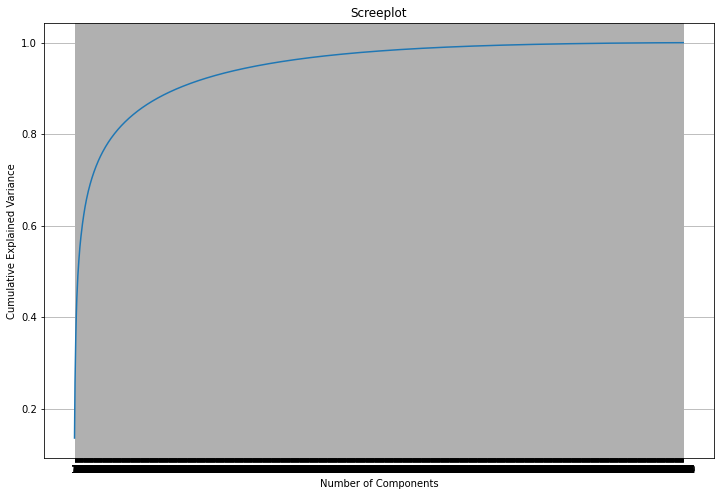

First 246 components explain 85.02423% of the variance of the selected features


In [ ]:
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Initialise PCA
pca = PCA(svd_solver='randomized', random_state=42)

# Fit PCA to the required features after scaling
pca.fit(df_train)

# Display the screeplot to determine how many componenets to keep
fig = plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.xticks(range(len(pca.explained_variance_ratio_)), range(1, len(pca.explained_variance_ratio_)+1))
plt.ylabel("Cumulative Explained Variance")
plt.title("Screeplot")
plt.grid()
plt.show()

idx=0
for x in pca.explained_variance_ratio_[:].cumsum():
    idx+=1
    if x > 0.85: break

# Display amount of variance explained
print("First %d components explain %2.5f%% of the variance of the selected features" 
      %(idx, sum(pca.explained_variance_ratio_[:idx])*100))

# Reinitialising PCA with the required number of components
pca = PCA(n_components=idx, svd_solver='randomized', random_state=42)

# Assigning new features to the train, validation and test dataset and dropping compressed features
df_train = pd.DataFrame(pca.fit_transform(df_train))
df_val = pd.DataFrame(pca.transform(df_val))
df_test = pd.DataFrame(pca.transform(df_test))

###### <font color=#B40404>We will use XGBClassifier to predict this multiclass problem. Hyperparameter tuning was left out of this notebook in interest of time and space. We are just displaying the best model according to us.

In [ ]:
y_train[train_mask]
from xgboost import XGBRegressor
import sklearn

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
scoring = ['accuracy', 'precision', 'recall']

# creating a KFold object 
folds = 3

# Creating the grid search
grid_search = RandomizedSearchCV(estimator = XGBRegressor(use_label_encoder=False, n_jobs=-1,
                                                           reg_lambda=0, random_state=42),
                                 param_distributions = {'learning_rate': [0.05, 0.10, 0.15, 
                                                                          0.20, 0.25, 0.30 ], 
                                                        'subsample': [0.3, 0.6, 0.9], 
                                                        "max_depth": range(3, 92, 5),
                                                        'n_estimators': [700, 800, 900], 
                                                        'reg_alpha': [0.1, 10]}, 
                                 n_iter = 100, 
                                 cv = folds, 
                                 verbose=10, 
                                 random_state=42, 
                                 n_jobs = -1,
                                 scoring= 'max_error',
                                 return_train_score=True)

# fit the model
grid_search.fit(df_train, y_sl[train_mask])

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 53

[16:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=88, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.1, reg_lambda=0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, use_label_encoder=False, verbosity=1)

In [ ]:
# Creating the model with the desired parameters
XGB = XGBClassifier(use_label_encoder=False, n_jobs=-1, reg_lambda=0, random_state=42, n_estimators=700, reg_alpha=0.1, learning_rate=0.05, 
                    subsample=0.6, max_depth=88)

# Fitting the train dataset to the model
XGB.fit(df_train, y_sl[train_mask])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=88,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0.1, reg_lambda=0, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, use_label_encoder=False, verbosity=1)

In [ ]:
# Predicting validation set results
res = XGB.predict_proba(df_val)

# Calculating the AUC score
roc_auc_score(y_sl[val_mask], res, multi_class='ovo', average='weighted')

0.8465612710955562

In [ ]:
y_sl[train_mask+val_mask]

array([1, 3, 5, ..., 3, 1, 3])

In [ ]:
XGB.fit(pd.concat([df_train, df_val], axis=0), y_sl[train_mask+val_mask])

In [ ]:
# Predicting the test set results
res = XGB.predict_proba(df_test)

# Calculating the AUC score
roc_auc_score(y_sl[test_mask], res, multi_class='ovo', average='weighted')

0.8434199642055848

###### • Neural networks 

###### <font color=#B40404>For Neural networks we will build 4 layers (3 Hidden, 1 output and 1 input). We will use relu activation and softmax to classify.

###### <font color=#B40404>First we will do the sanity checks and do some hyper parameter tuning. Please note that we have not displayed all the steps of Sanity check and Hyper Parameter Tuning.

In [ ]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):
    
    # Initialising
    iterations = iterations
    learning_rate=lr

    # Adding Layers
    model_nn = Sequential()

    model_nn.add(Dense(1024, input_shape=(30000, ), activation="relu"))
    model_nn.add(Dense(4096, activation="relu"))
    model_nn.add(Dense(1024, activation="relu"))
    model_nn.add(Dense(12, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(Lambda)))
    
    # Buildong Optimiser
    sgd = tf.keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    
    # Compiling model
    model_nn.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['AUC'])
    
    # Fitting the model
    model_nn.fit(X_train[train_mask].reshape(len(train_mask), 30000), y_train[train_mask], 
              epochs=iterations, batch_size=25, verbose=2, 
                 validation_data=(X_train[val_mask].reshape(len(val_mask), 30000), y_train[val_mask]))

In [ ]:
lr = 0.001
Lambda = 1e-3
train_and_test_loop(25, lr, Lambda)

Epoch 1/25
95/95 - 27s - loss: 2.4408 - auc: 0.6142 - val_loss: 2.4042 - val_auc: 0.6458
Epoch 2/25
95/95 - 26s - loss: 2.3341 - auc: 0.6813 - val_loss: 2.2882 - val_auc: 0.7131
Epoch 3/25
95/95 - 26s - loss: 2.2066 - auc: 0.7403 - val_loss: 2.1642 - val_auc: 0.7487
Epoch 4/25
95/95 - 26s - loss: 2.0763 - auc: 0.7823 - val_loss: 2.1256 - val_auc: 0.7631
Epoch 5/25
95/95 - 26s - loss: 1.9598 - auc: 0.8123 - val_loss: 2.0351 - val_auc: 0.7841
Epoch 6/25
95/95 - 26s - loss: 1.8245 - auc: 0.8442 - val_loss: 1.8756 - val_auc: 0.8275
Epoch 7/25
95/95 - 26s - loss: 1.7489 - auc: 0.8574 - val_loss: 2.0151 - val_auc: 0.7925
Epoch 8/25
95/95 - 26s - loss: 1.6541 - auc: 0.8754 - val_loss: 1.8316 - val_auc: 0.8400
Epoch 9/25
95/95 - 26s - loss: 1.6187 - auc: 0.8795 - val_loss: 1.8206 - val_auc: 0.8391
Epoch 10/25
95/95 - 26s - loss: 1.5570 - auc: 0.8898 - val_loss: 1.6848 - val_auc: 0.8696
Epoch 11/25
95/95 - 26s - loss: 1.4311 - auc: 0.9101 - val_loss: 1.8346 - val_auc: 0.8432
Epoch 12/25
95/95 -

In [ ]:
# Setting Parameters
iterations = 25
learning_rate=0.001

# Building the Architecture
model_nn = Sequential()

model_nn.add(Dense(1024, input_shape=(30000, ), activation="relu"))
model_nn.add(Dense(4096, activation="relu"))
model_nn.add(Dense(1024, activation="relu"))
model_nn.add(Dense(12, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(1e-3)))

# Building the optimiser
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate, decay=1e-6, momentum=0.9)

# Compiling model
model_nn.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['AUC'])

# Fitting the model
history = model_nn.fit(X_train[train_mask].reshape(len(train_mask), 30000), y_train[train_mask], 
                       epochs=iterations, batch_size=25, verbose=2, 
                       validation_data=(X_train[val_mask].reshape(len(val_mask), 30000), y_train[val_mask]))

Epoch 1/25
95/95 - 23s - loss: 2.4422 - auc: 0.6123 - val_loss: 2.4084 - val_auc: 0.6387
Epoch 2/25
95/95 - 22s - loss: 2.3633 - auc: 0.6650 - val_loss: 2.3247 - val_auc: 0.6878
Epoch 3/25
95/95 - 22s - loss: 2.2327 - auc: 0.7322 - val_loss: 2.2051 - val_auc: 0.7421
Epoch 4/25
95/95 - 22s - loss: 2.1132 - auc: 0.7718 - val_loss: 2.1161 - val_auc: 0.7661
Epoch 5/25
95/95 - 22s - loss: 1.9742 - auc: 0.8102 - val_loss: 1.9833 - val_auc: 0.8059
Epoch 6/25
95/95 - 22s - loss: 1.8965 - auc: 0.8252 - val_loss: 1.9354 - val_auc: 0.8166
Epoch 7/25
95/95 - 22s - loss: 1.8086 - auc: 0.8459 - val_loss: 1.8574 - val_auc: 0.8346
Epoch 8/25
95/95 - 22s - loss: 1.6855 - auc: 0.8698 - val_loss: 1.8649 - val_auc: 0.8298
Epoch 9/25
95/95 - 22s - loss: 1.6180 - auc: 0.8814 - val_loss: 1.7200 - val_auc: 0.8592
Epoch 10/25
95/95 - 22s - loss: 1.5566 - auc: 0.8901 - val_loss: 1.9101 - val_auc: 0.8285
Epoch 11/25
95/95 - 22s - loss: 1.5018 - auc: 0.8989 - val_loss: 1.6575 - val_auc: 0.8731
Epoch 12/25
95/95 -

###### <font color=#B40404>Displaying the Neural Network train vs validation graphs

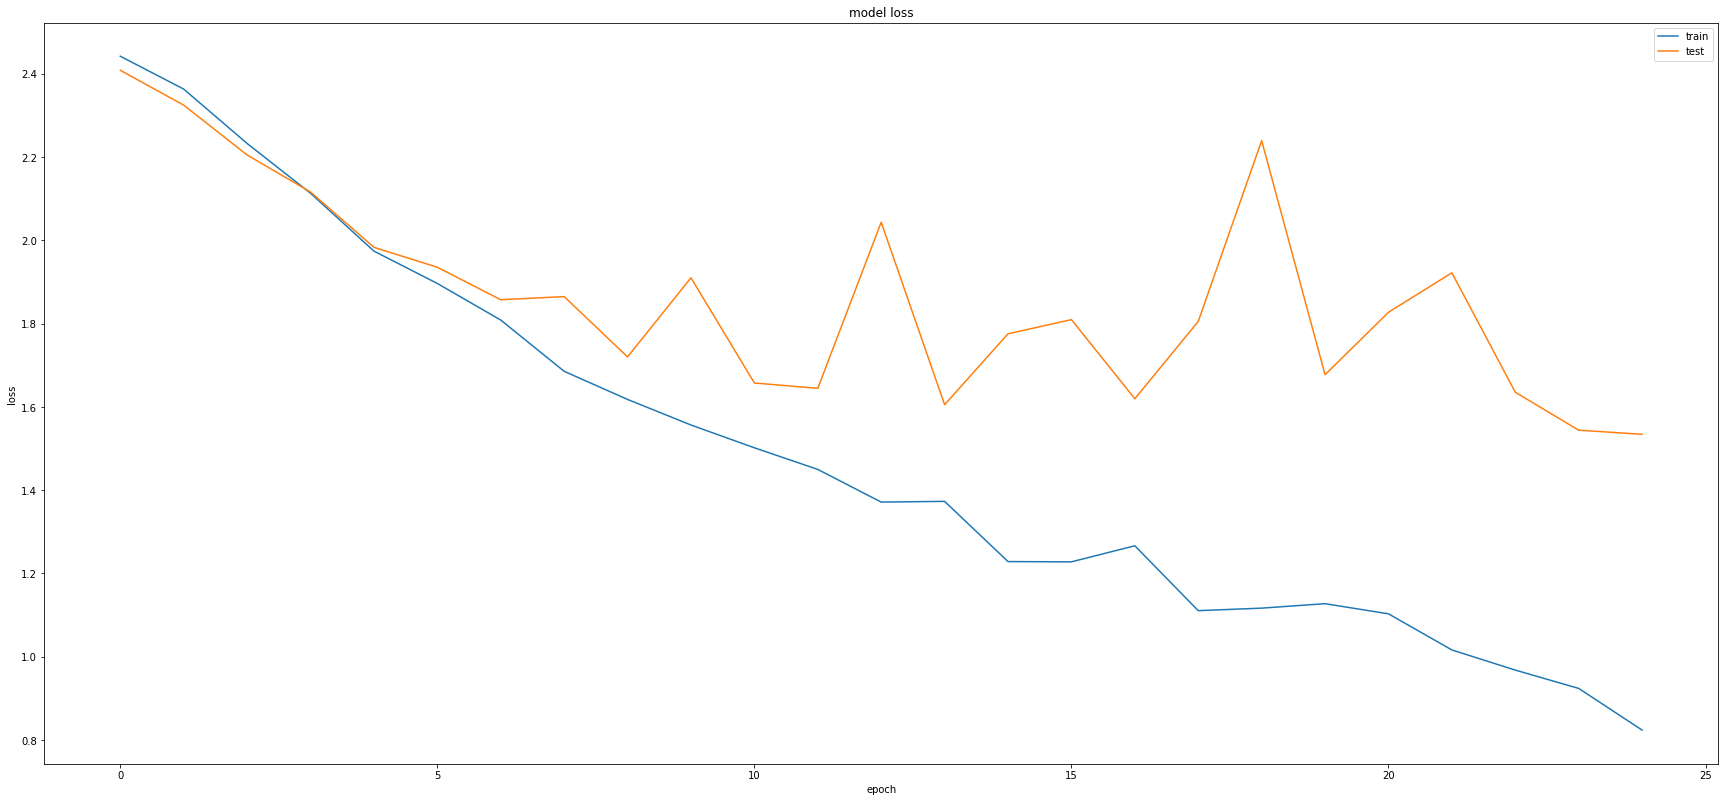

In [ ]:
# Displaying chart from history
plt.figure(figsize = (30, 30))
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

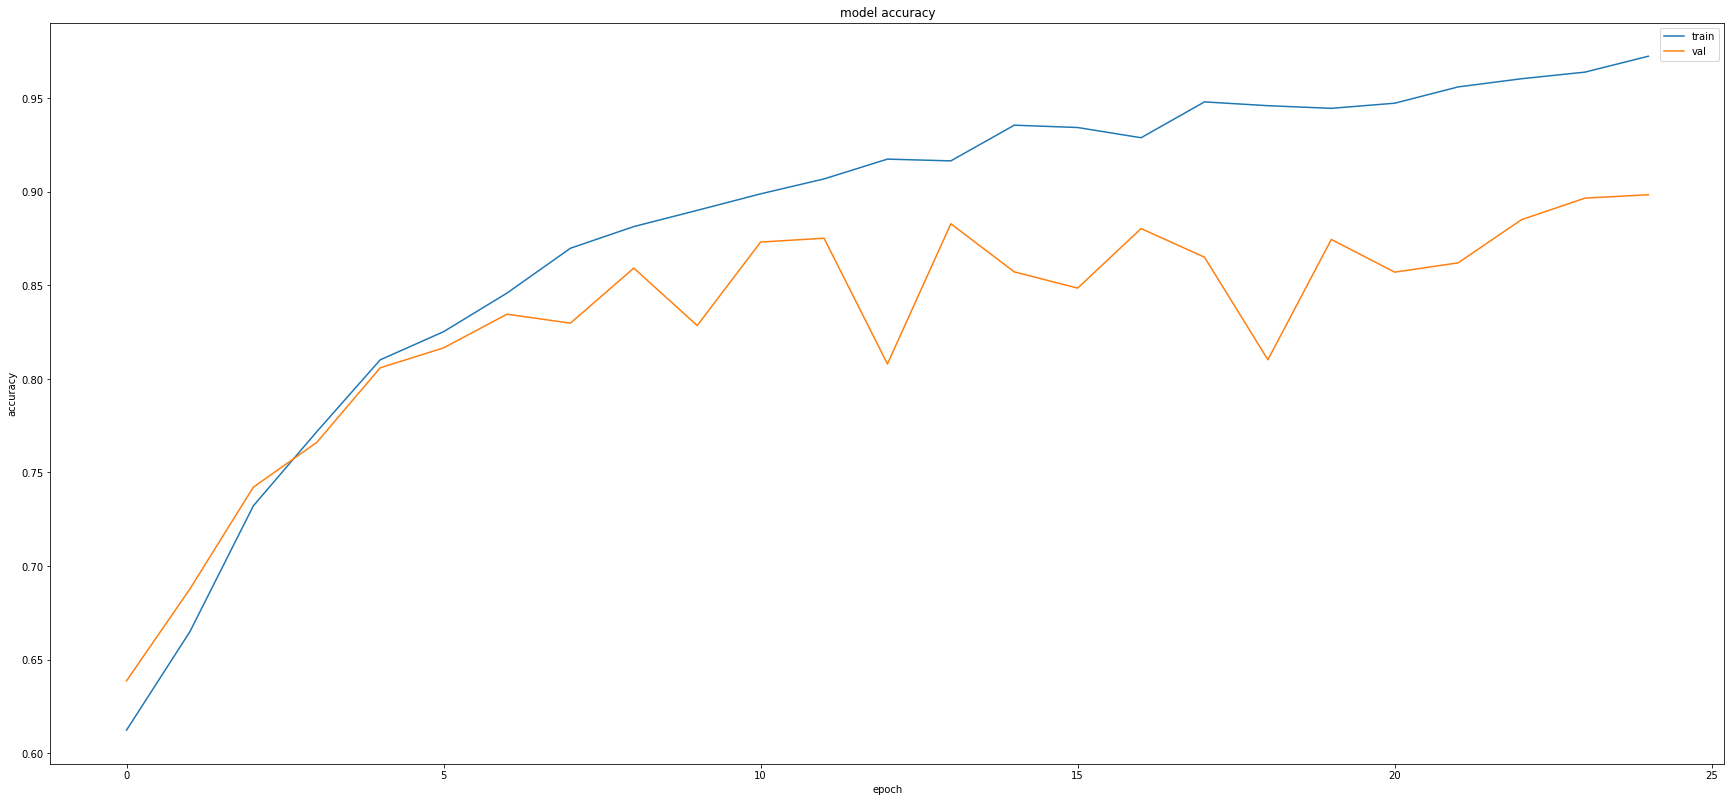

In [ ]:
# Displaying chart from history

plt.figure(figsize = (30, 30))
plt.subplot(2,1,2)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

###### <font color=#B40404>Due to space and resources issues we are going to test on the test set by training only on the train set

In [ ]:
# Evaluating on test set
model_nn.evaluate(X_train[test_mask].reshape(len(test_mask), 30000), y_train[test_mask])

30/30 [==============================] - 2s 71ms/step - loss: 1.4767 - auc: 0.9060


[1.4766616821289062, 0.9060055613517761]

###### • CNN

###### <font color=#B40404>For CNN we will have two Convolution Layers after which we will flatten the data

###### <font color=#B40404>Due to constraints we will have the input size as 100x100x3

###### <font color=#B40404>Since the data set classes are unequally distributed, we will use auc as metric instead of accuracy

In [ ]:
# Creating the Convolution Network
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(100, 100, 3)))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(12, activation="softmax"))

# Selecting Optimiser
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.85)

# Compiling the model with Metric AUC
model.compile(loss="categorical_crossentropy", metrics=["AUC"], optimizer=optimiser)

# Collecting history while fitting the model
history = model.fit(x=X_train[train_mask], y=y_train[train_mask], batch_size=50, epochs=10, 
          validation_data = (X_train[val_mask], y_train[val_mask]))

Epoch 1/10
48/48 [==============================] - 197s 4s/step - loss: 2.4072 - auc: 0.6252 - val_loss: 2.2428 - val_auc: 0.7437
Epoch 2/10
48/48 [==============================] - 190s 4s/step - loss: 1.9535 - auc: 0.8104 - val_loss: 1.7918 - val_auc: 0.8411
Epoch 3/10
48/48 [==============================] - 190s 4s/step - loss: 1.5849 - auc: 0.8829 - val_loss: 1.5179 - val_auc: 0.8920
Epoch 4/10
48/48 [==============================] - 196s 4s/step - loss: 1.2932 - auc: 0.9262 - val_loss: 1.4031 - val_auc: 0.9077
Epoch 5/10
48/48 [==============================] - 191s 4s/step - loss: 1.1083 - auc: 0.9469 - val_loss: 1.2533 - val_auc: 0.9277
Epoch 6/10
48/48 [==============================] - 194s 4s/step - loss: 0.9065 - auc: 0.9653 - val_loss: 1.1725 - val_auc: 0.9362
Epoch 7/10
48/48 [==============================] - 194s 4s/step - loss: 0.7793 - auc: 0.9734 - val_loss: 1.1851 - val_auc: 0.9340
Epoch 8/10
48/48 [==============================] - 193s 4s/step - loss: 0.6283 - a

###### <font color=#B40404>Please note that we have performed sanity checks and have carried out tuning but have not displayed the hypertuning work in this notebook. Only the optimal model, according to us, is being shared

###### <font color=#B40404>Displaying the Convolution Neural Network train vs validation graphs

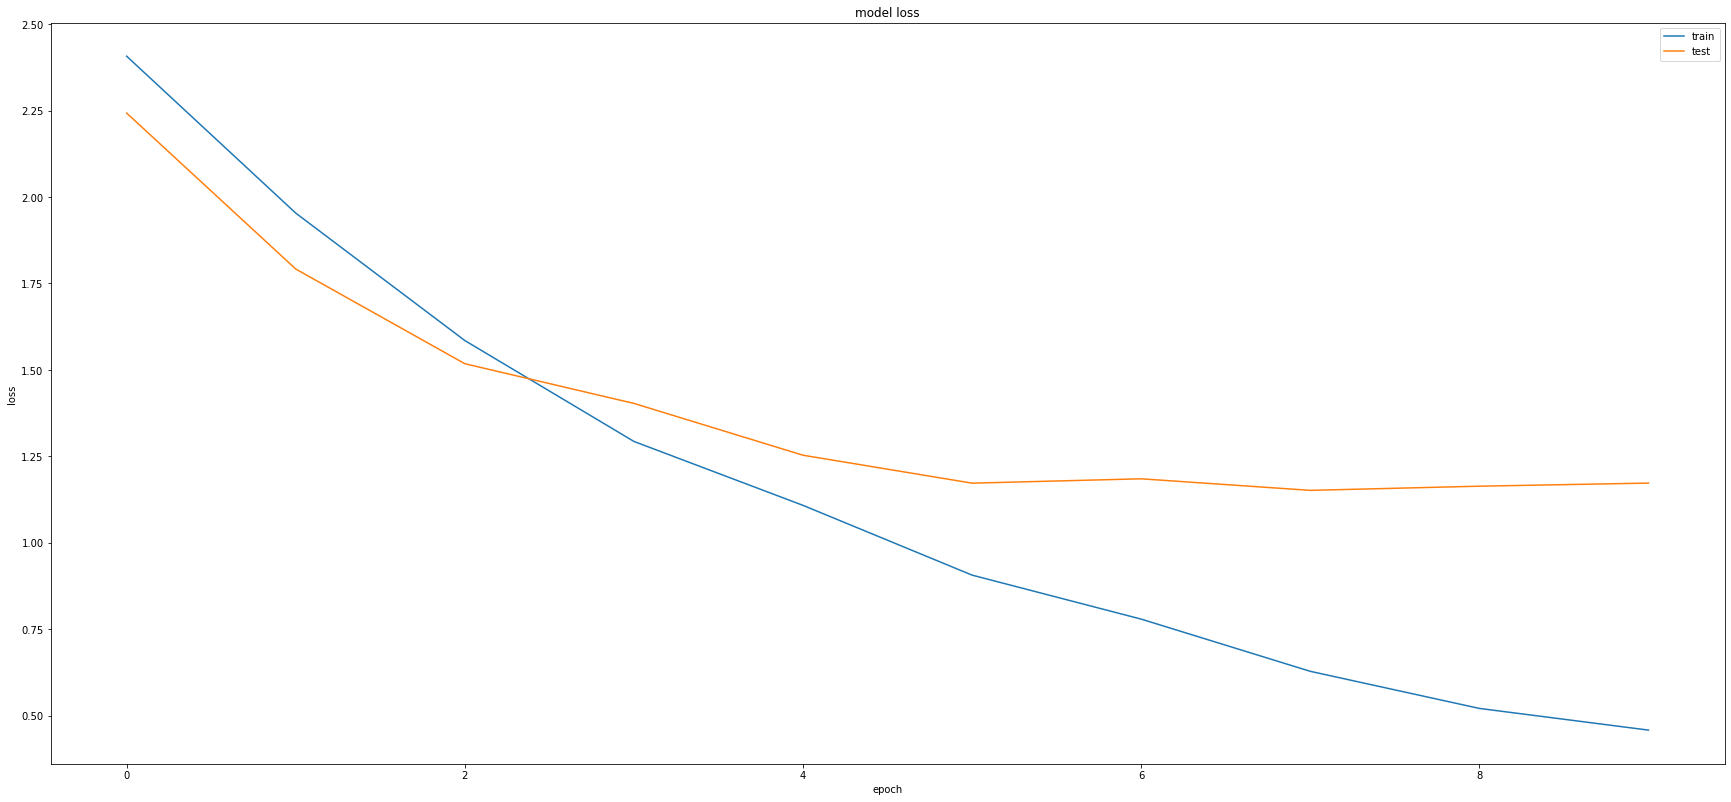

In [ ]:
# Displaying the graph
plt.figure(figsize = (30, 30))
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

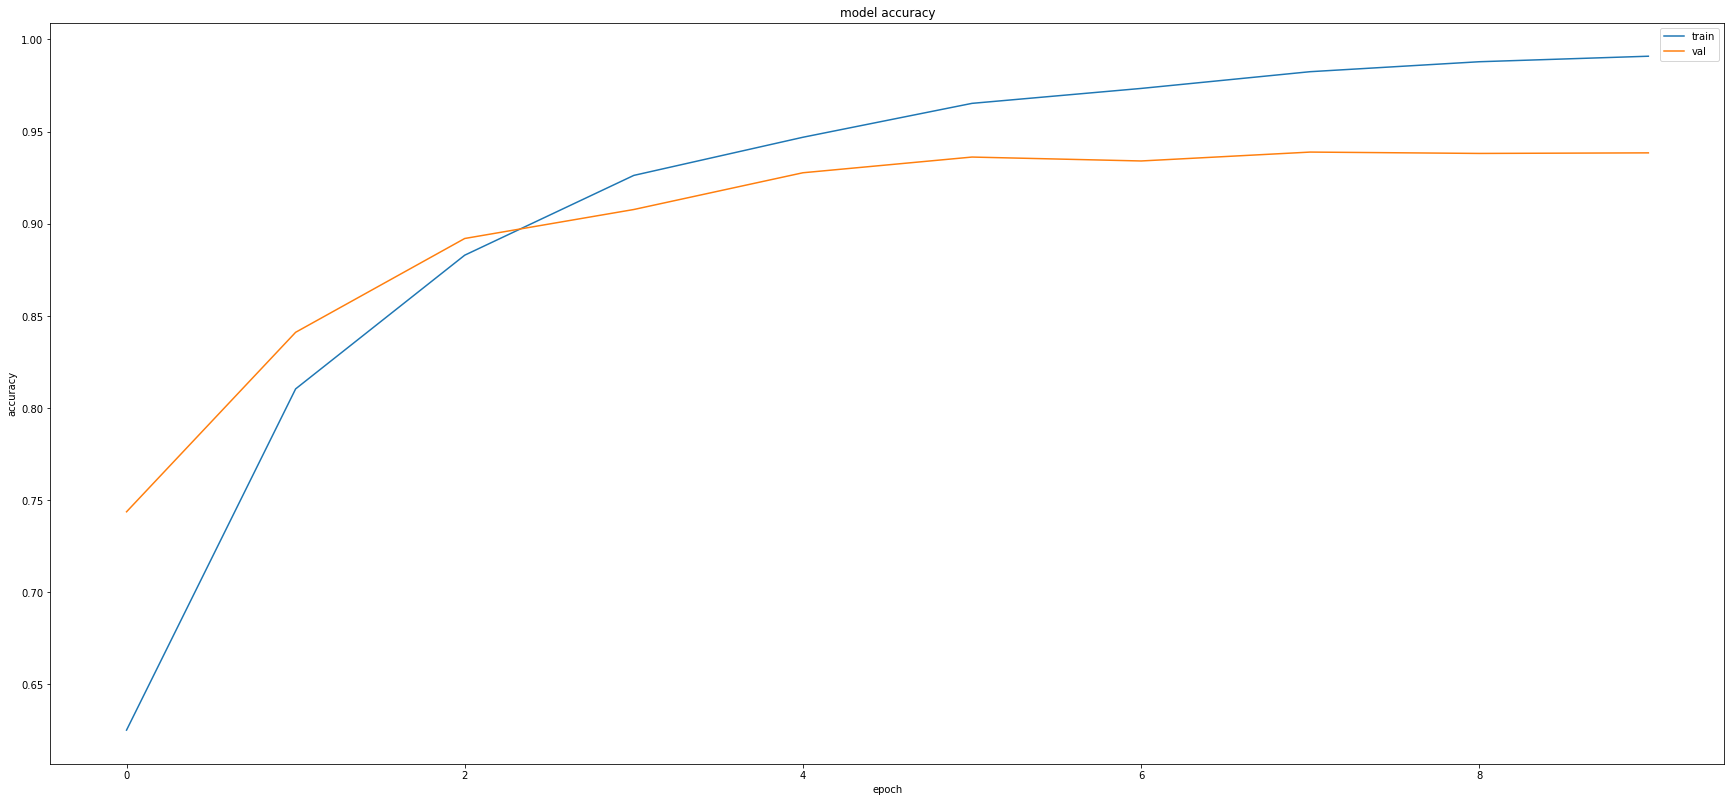

In [ ]:
# Displaying chart with data collected from history
plt.figure(figsize = (30, 30))
plt.subplot(2,1,2)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

###### <font color=#B40404>Due to space and resources issues we are going to test on the test set by training only on the train set

In [ ]:
# Evaluating model on test set
model.evaluate(X_train[test_mask], y_train[test_mask])

30/30 [==============================] - 16s 534ms/step - loss: 1.0943 - auc: 0.9421


[1.0942720174789429, 0.9421104788780212]

#### 3. Compare the results from the above step along with your detailed observations on the best performing algorithm and why/how it outperforms other algorithms in this case.

###### <font color=#B40404>Out of the three algorithms CNN has given the best results. Both on Validation Set and Test Set it has predicted at around 94% AUC. This means, although the proof is not substantial, that the variance of this model is not too high. The reason that this model performed the best is that Convolution was introduced here, and hence particular features 69 from first layer and 69 on second layer were extracted which was passed to a Neural Network for processing. This additional convolution and feature extraction improved the performance of the CNN model as compared to Neural Networks and other traditional methods.

###### <font color=#B40404>On the other hand on the Neural Network, the AUC of Validation and Test set was around 90%. This is our second best model. When we observe the AUC score graph of Validation and Train set we find that Validation Results were much more jittery as the training progressed which may mean we did not find the lowest loss and highest AUC for the Validation set.

###### <font color=#B40404>Finally the traditional model of XGBClassifier, which also did a good job when it comes AUC scores, around 84%, was our weakest model. Although due to space and RAM constraints we selected much bigger pixel sizes for our image (100x100x3). Even then dimensionality issues would creep in with 30000 different features. Hence we had to use PCA, where we lost some information. So overall it was expected that traditional methods will not beat Neural Networks, yet even our third model did a good job.

###### <font color=#B40404>With better resources and tools better results could have been predicted. Due to time constraints we did not try Transfer Learning which could have yielded better results.


#### 4. Pickle the best performing model.

In [ ]:
import pickle
from keras_pickle_wrapper import KerasPickleWrapper

# Wrap a compiled model
mw = KerasPickleWrapper(model)

# Create Pickle file from the pipeline created around the final model
with open('final_model.pickle', 'wb') as dump_var:
    pickle.dump(mw, dump_var)

In [ ]:
with open('final_model.pickle', 'rb') as pkl:
  final_model = pickle.load(pkl)

final_model().evaluate(X_train[test_mask], y_train[test_mask])

30/30 [==============================] - 16s 534ms/step - loss: 1.0943 - auc: 0.9421


[1.0942720174789429, 0.9421104788780212]

#### 5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained image classifier model to predict the class

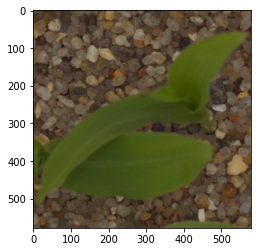

At 51.10% confidence this plant is Common Chickweed


In [ ]:
file_name = "/content/drive/My Drive/Predict.png"

picture = Image.open(file_name)

plt.imshow(picture)
plt.show()

picture = np.array(tf.image.resize_with_pad(np.array(picture), 100, 100, antialias=True))/255
pred = final_model().predict(picture.reshape(1, 100, 100, 3))
print("At %2.2f%% confidence this plant is %s" %(100*pred.max(), le.inverse_transform([pred.argmax()])[0]))

In [ ]:
dict(zip(le.classes_, pred[0]))

{'Black-grass': 1.6020054e-09,
 'Charlock': 8.3870924e-05,
 'Cleavers': 5.491526e-05,
 'Common Chickweed': 0.51099986,
 'Common wheat': 1.0876441e-07,
 'Fat Hen': 0.0026121568,
 'Loose Silky-bent': 4.5305282e-07,
 'Maize': 0.06814239,
 'Scentless Mayweed': 0.020022295,
 'Shepherds Purse': 0.37777406,
 'Small-flowered Cranesbill': 0.01992349,
 'Sugar beet': 0.00038643938}

In [ ]:
pred = model_nn.predict(picture.reshape(1, 30000))
print("At %2.2f%% confidence this plant is %s" %(100*pred.max(), le.inverse_transform([pred.argmax()])[0]))

At 75.13% confidence this plant is Shepherds Purse


In [ ]:
pca.transform(pd.DataFrame(picture.reshape(1, 30000)))

array([[-3.96337450e-01, -2.15748024e+00,  3.84094477e-01,
         1.24220014e-01,  1.40768385e+00, -4.01646227e-01,
         1.23585546e+00,  1.06485762e-01, -2.68098891e-01,
         3.27107072e+00,  2.25612894e-02, -2.43981409e+00,
        -2.34554601e+00,  7.36474395e-01, -3.13750058e-01,
        -1.11850488e+00, -2.99026430e-01, -5.10316610e-01,
         1.40845883e+00,  3.24614912e-01, -1.08491910e+00,
        -7.11124361e-01,  5.95402867e-02,  2.58733511e-01,
        -4.97414887e-01,  5.37642658e-01,  9.01572824e-01,
         1.35226989e+00,  2.03167543e-01,  2.90713869e-02,
         3.34709227e-01,  6.77678645e-01,  4.32742387e-01,
        -2.47905061e-01, -3.93312015e-02,  8.09118867e-01,
         1.33279219e-01, -7.63485909e-01, -4.93544728e-01,
         2.87818193e-01,  4.71353441e-01,  1.71872169e-01,
        -6.30286038e-01, -5.34750998e-01, -2.88741797e-01,
        -2.64380902e-01, -5.46150684e-01, -2.37980634e-01,
        -1.06615722e+00, -4.35505271e-01,  9.63823274e-0

In [ ]:
file_name = "/content/drive/My Drive/Predict.png"

picture = Image.open(file_name)

# plt.imshow(picture)
# plt.show()

picture = np.array(tf.image.resize_with_pad(np.array(picture), 100, 100, antialias=True))/255

pred = XGB.predict(pd.DataFrame(pca.transform(pd.DataFrame(picture.reshape(1, 30000)))))
print("At %2.2f%% confidence this plant is %s" %(100*pred.max(), le.inverse_transform([pred.argmax()])[0]))

At 300.00% confidence this plant is Black-grass
